<h1 style="color:#FA7A35;font-family:Georgia">Lead Case Study</h1>


## Lead Scoring

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

                  
                                
                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


<h1 style="color:#FA7A35;font-family:Georgia">Importing Libraries</h1>

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
# setting up  max columns to None, which prints all the columns in pd.show()
pd.options.display.max_columns = None

# Importing sk learn libraries for data modelling, train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing Logsitic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Importing model evaluation metrics from sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

# Importing stats model for VIF calculations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<h1 style="color:#FA7A35;font-family:Georgia">Reading and understanding data</h1>

In [2]:
# Loading Data into pandas data frame
data = pd.read_csv("Leads.csv")
# printing the top 5 rows of the data frame
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking for the count of rows and columns.
data.shape

(9240, 37)

In [4]:
# printing data information with data types and non-null count for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# examine the numerical columns in the data frame
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# scanning Number of Null/Empty values in  each column
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Percentage of Null/Empty values in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Count of Duplicated Rows in the Data Frame
data.duplicated().sum()

0

<h5 style = "color:#00539CFF">Observations:</h5>

1. The data set has a total of <span style="color:Green">9240 rows and 37 columns.</span> <br>
2. The target variable is the column - Converted.<br>
3. The columns - Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score have high percentages of missing values which should be treated.<br>
4. There are no duplicate datas available.<br>
5. Prospect ID and Lead Number both serve the same purpose. They are both unique identifiers. We will drop Prospect ID.<br>
6. Few columns have "Select" in their entries which should be changed to null.<br>


<h1 style="color:#FA7A35;font-family:Georgia">Data Preparation</h1>

<h2 style="color:Blue;font-family:Georgia">Renaming the columns</h2>

In [9]:
# printing column names
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Replacing space with _ in column names
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [11]:
# Renaming Columns for easy understanding
data.rename(columns={'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview' }, inplace=True)
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity', 'country',
       'specialization', 'source', 'occupation', 'course_selection_reason',
       'search', 'magazine', 'newspaper_article', 'x_education_forums',
       'newspaper', 'digital_advertisement', 'through_recommendations',
       'courses_updates', 'tags', 'lead_quality',
       'supply_chain_content_updates', 'dm_content_updates', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_interview', 'last_notable_activity'],
      dtype='object')

<h2 style="color:Blue;font-family:Georgia">Dealing with 'select'</h2>

In [12]:
# replacing "select" value to a np.NaN value
data=data.replace('Select', np.NaN)

In [13]:
# Percentages of Null Values in each column
round(100*(data.isna().sum()/len(data.index)),2)

prospect_id                      0.00
lead_number                      0.00
lead_origin                      0.00
lead_source                      0.39
do_not_email                     0.00
do_not_call                      0.00
converted                        0.00
total_visits                     1.48
time_on_website                  0.00
page_views_per_visit             1.48
last_activity                    1.11
country                         26.63
specialization                  36.58
source                          78.46
occupation                      29.11
course_selection_reason         29.32
search                           0.00
magazine                         0.00
newspaper_article                0.00
x_education_forums               0.00
newspaper                        0.00
digital_advertisement            0.00
through_recommendations          0.00
courses_updates                  0.00
tags                            36.29
lead_quality                    51.59
supply_chain

<h5 style = "color:#00539CFF">Observations:</h5>
1. there is a huge change in the percentage of null values after replacing columns containing select with Null.<br>
2. Lead Profile, Source columns have 70 % of Null Values

In [14]:
#dropping prospect_id and lead_number as they are unique id's representing each row and does not add value to our analysis
data.drop(['prospect_id','lead_number'], axis=1, inplace=True)

<h2 style="color:Blue;font-family:Georgia">Dealing with Null values </h2>

<h5 style = "color:#00539CFF">Observations:</h5>
<p> The columns source, lead_quality, lead_profile, asymmetrique_activity_index, asymmetrique_profile_index, asymmetrique_activity_score, asymmetrique_profile_score have null values more than 40% </p>

<b> Dropping the columns which have more than 40 % of Null values

In [15]:
data.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score'], 
        axis = 1, inplace = True)

(round(100*(data.isna().sum()/len(data.index)),2))

lead_origin                      0.00
lead_source                      0.39
do_not_email                     0.00
do_not_call                      0.00
converted                        0.00
total_visits                     1.48
time_on_website                  0.00
page_views_per_visit             1.48
last_activity                    1.11
country                         26.63
specialization                  36.58
occupation                      29.11
course_selection_reason         29.32
search                           0.00
magazine                         0.00
newspaper_article                0.00
x_education_forums               0.00
newspaper                        0.00
digital_advertisement            0.00
through_recommendations          0.00
courses_updates                  0.00
tags                            36.29
supply_chain_content_updates     0.00
dm_content_updates               0.00
city                            39.71
cheque_payment                   0.00
mastering_in

 <b>Dealing with other columns having null values </b>

In [16]:
#lead_source , a categorical variable
data['lead_source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: lead_source, dtype: object

In [17]:
# unique values in lead_score
data['lead_source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [18]:
# value counts for each unique category in lead_Score
data['lead_source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

In [19]:
#replacing null values with Google and replacing google with Google
#replacing categories with low counts as others
data['lead_source']=data['lead_source'].replace([np.NaN, 'google'], 'Google')
data['lead_source']=data['lead_source'].replace(['Referral Sites','Facebook', 'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone',
                                                'Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Others')

In [20]:
# checking for value_counts
data['lead_source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: lead_source, dtype: int64

In [21]:
#total_visits, Numerical variable
data['total_visits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: total_visits, dtype: float64

In [22]:
# Replacing Null Values in 'TotalVisits' with median
data['total_visits'] = data['total_visits'].replace(np.nan, data['total_visits'].median())

In [23]:
# page_views_per_visit, Numerical variable
data['page_views_per_visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [24]:
# Replacing Null Values in 'page_views_per_visit' with median
data['page_views_per_visit'] = data['page_views_per_visit'].replace(np.nan, data['page_views_per_visit'].median())

In [25]:
# page_views_per_visit, Numerical variable
data['page_views_per_visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [26]:
#last_activity, categorical variable
data.last_activity.value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

In [27]:
# Replacing the NA values and others with low count as Others
data['last_activity'] = data['last_activity'].replace(np.nan, 'Email Opened')
data['last_activity'] = data['last_activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

In [28]:
# country, Categorical variable
data['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

<h5 style = "color:#00539CFF">Observations:</h5>
as it is observed from above that India is the most frequent country value, 90% of the column values contains India.
So this column doesn't fit in modelling.


In [29]:
# Dropping Country column since, more than 90% values are India or NA
data.drop('country', axis=1, inplace=True)

In [30]:
#specialization, Categorical Column
data.specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: specialization, dtype: int64

In [31]:
data['specialization'] = data['specialization'].replace(np.nan, 'Not Specified')
# Grouping values with low count in order to remove bias
# Management Specialization
data['specialization'] = data['specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')
# Business Specialization
data['specialization'] = data['specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

In [32]:
#occupation, categorical variable
data.occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: occupation, dtype: int64

In [33]:
# replacing Null values with "Not Specified"
# Replacing Businessman and Housewife with others as they are low in counts
data['occupation'] = data['occupation'].replace(np.nan, 'Not Specified')
data['occupation'] = data['occupation'].replace(['Housewife', 'Businessman'],'Other')

In [34]:
#course_selection_reason, categorical variable
data.course_selection_reason.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: course_selection_reason, dtype: int64

<h5 style = "color:#00539CFF">Observations:</h5>
as it is observed from above that Better Career Prospects is the most frequent country value, 95% of the column values contains India.
So this column doesn't fit in modelling.

In [35]:
#dropping the colum course_selection_reason as most of its data is null and the other major part is better career prospects
data.drop('course_selection_reason', axis=1, inplace=True)

In [36]:
#tags,categorical variable
data.tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [37]:
# Grouping values with low count
data['tags'] = data['tags'].replace(np.nan, 'Not Specified')
data['tags'] = data['tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [38]:
#city, categorical variable
data.city.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [39]:
# Dropping the City column as most entries are Mumbai or not known
data.drop('city', axis=1,inplace=True)

In [40]:
(round(100*(data.isna().sum()/len(data.index)),2))

lead_origin                     0.0
lead_source                     0.0
do_not_email                    0.0
do_not_call                     0.0
converted                       0.0
total_visits                    0.0
time_on_website                 0.0
page_views_per_visit            0.0
last_activity                   0.0
specialization                  0.0
occupation                      0.0
search                          0.0
magazine                        0.0
newspaper_article               0.0
x_education_forums              0.0
newspaper                       0.0
digital_advertisement           0.0
through_recommendations         0.0
courses_updates                 0.0
tags                            0.0
supply_chain_content_updates    0.0
dm_content_updates              0.0
cheque_payment                  0.0
mastering_interview             0.0
last_notable_activity           0.0
dtype: float64

<b> checking the other variables

In [41]:
# do_not_call              
data.do_not_call.value_counts()

No     9238
Yes       2
Name: do_not_call, dtype: int64

In [42]:
# Search column
data.search.value_counts()

No     9226
Yes      14
Name: search, dtype: int64

In [43]:
# magazine column
data.magazine.value_counts()

No    9240
Name: magazine, dtype: int64

In [44]:
# Newspaper_article
data.newspaper_article.value_counts()

No     9238
Yes       2
Name: newspaper_article, dtype: int64

In [45]:
# x_education_forums
data.x_education_forums.value_counts()

No     9239
Yes       1
Name: x_education_forums, dtype: int64

In [46]:
# newspaper
data.newspaper.value_counts()

No     9239
Yes       1
Name: newspaper, dtype: int64

In [47]:
# digital_adverstisement 
data.digital_advertisement.value_counts()

No     9236
Yes       4
Name: digital_advertisement, dtype: int64

In [48]:
# through_recommendations
data.through_recommendations.value_counts()

No     9233
Yes       7
Name: through_recommendations, dtype: int64

In [49]:
# courses_updates
data.courses_updates.value_counts()

No    9240
Name: courses_updates, dtype: int64

In [50]:
# supply_chain_content_updates
data.supply_chain_content_updates.value_counts()

No    9240
Name: supply_chain_content_updates, dtype: int64

In [51]:
# dm_content_updates
data.dm_content_updates.value_counts()

No    9240
Name: dm_content_updates, dtype: int64

In [52]:
# cheque_payment
data.cheque_payment.value_counts()

No    9240
Name: cheque_payment, dtype: int64

In [53]:
# last_notable_activity
data.last_notable_activity.value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: last_notable_activity, dtype: int64

In [54]:
#replacing the values with low counts to others
data.last_notable_activity=data.last_notable_activity.replace(['Email Bounced','Unsubscribed','Page Visited on Website',
                                                               'Olark Chat Conversation','Unreachable','Had a Phone Conversation',
                                                               'Email Marked Spam', 'Approached upfront','Resubscribed to emails',
                                                               'View in browser link Clicked','Form Submitted on Website','Email Received',
                                                              'Email Link Clicked'],'Others')

In [55]:
data.last_notable_activity.value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Others           834
Name: last_notable_activity, dtype: int64

<h5 style = "color:#00539CFF">Observations:</h5> <br>
 As it is Observed that  'do_not_call','search','magazine','newspaper_article','x_education_forums','newspaper','digital_advertisement',
'through_recommendations','courses_updates', 'supply_chain_content_updates','dm_content_updates','cheque_payment' have most of the column values are either Yes / No.
Dropping these Columns as it doesnt fit in Modelling

In [56]:
drop_cln=['do_not_call','search','magazine','newspaper_article','x_education_forums','newspaper','digital_advertisement',
         'through_recommendations','courses_updates', 'supply_chain_content_updates','dm_content_updates','cheque_payment']

In [57]:
data.drop(drop_cln,axis=1, inplace=True)

In [58]:
data.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'total_visits', 'time_on_website', 'page_views_per_visit',
       'last_activity', 'specialization', 'occupation', 'tags',
       'mastering_interview', 'last_notable_activity'],
      dtype='object')

<h2 style="color:Blue;font-family:Georgia">Dealing with outliers</h2>

In [59]:
# Numerical Variables
data.describe()

,converted,total_visits,time_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


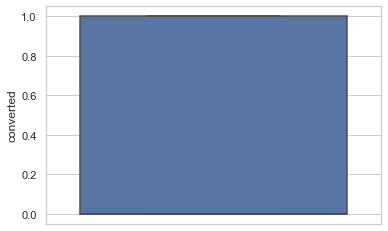

In [60]:
# Plotting converted column
sns.boxplot(y=data.converted)
plt.show()

In [61]:
# describe the converted column
data.converted.describe()

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: converted, dtype: float64

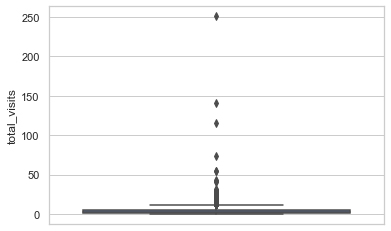

In [62]:
# total_visits column
sns.boxplot(y=data.total_visits)
plt.show()

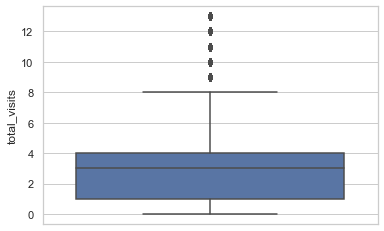

In [63]:
# Removing the top 1% of the value to handle outliers
data = data[(data['total_visits'] <= data['total_visits'].quantile(0.98))]
sns.boxplot(y = data['total_visits'])
plt.show()

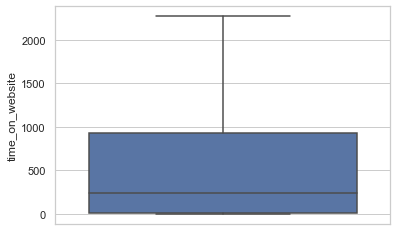

In [64]:
#time_on_website
sns.boxplot(y=data.time_on_website)
plt.show()

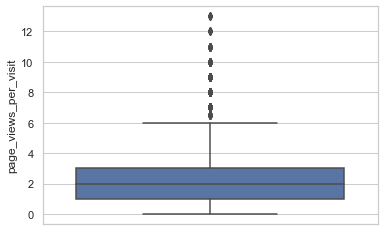

In [65]:
#page_views_per_visit
sns.boxplot(y=data.page_views_per_visit)
plt.show()

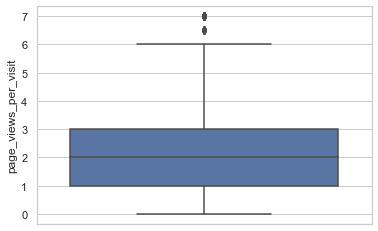

In [66]:
# Removing the top 1% of the value to handle outliers
data = data[(data['page_views_per_visit'] <= data['page_views_per_visit'].quantile(0.98))]
sns.boxplot(y = data['page_views_per_visit'])
plt.show()

<h2 style="color:Blue;font-family:Georgia">Univariate analysis</h2>

In [67]:
data.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,mastering_interview,last_notable_activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [68]:
# changing the columns 'do_not_email' and 'mastering_interview' having yes/no to 1/0
def data_map(x):
    return x.map({'Yes': 1, 'No':0})

temp_list = ['do_not_email', 'mastering_interview']

# Applying the above custom function

data[temp_list] = data[temp_list].apply(data_map)

In [69]:
data.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,mastering_interview,last_notable_activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


<h3> Univariate Analysis for Categorical variables</h3>

In [70]:
#function for plotting the columns
def univar_analysis(col):
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x = col, hue = data.converted, data=data)
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()

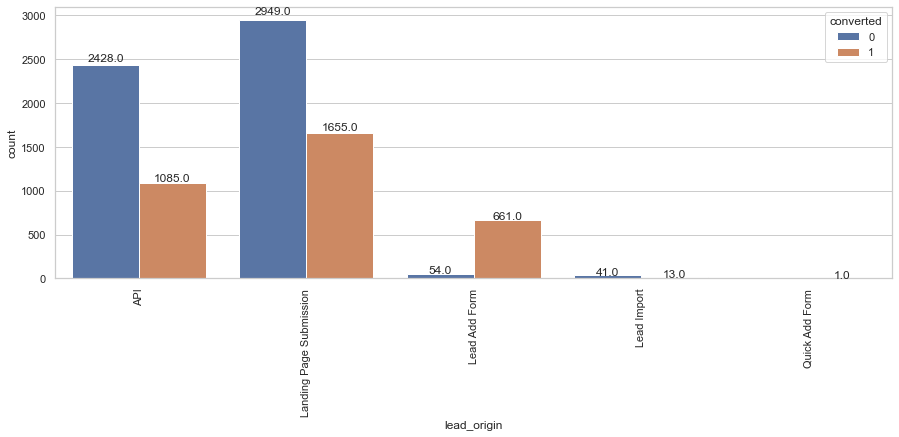

In [71]:
# plotting count plot for lead_origin
univar_analysis('lead_origin')

<h5 style = "color:#00539CFF">Observations:</h5> <br>Customers identified via Lead Add Form tend to have a high rate of conversion


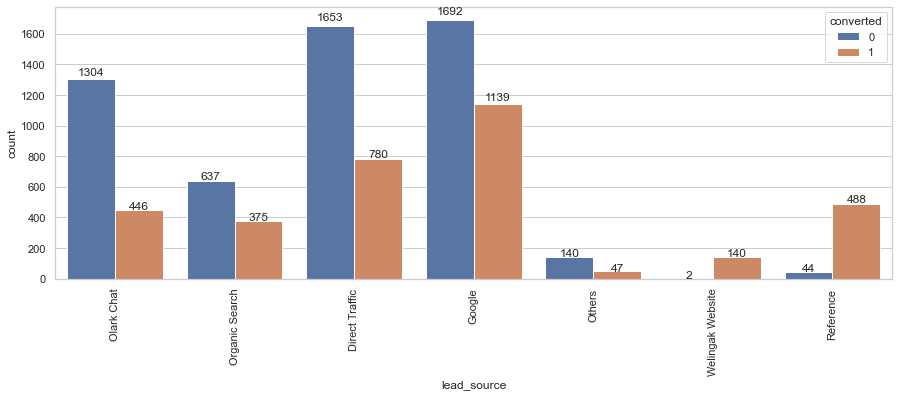

In [72]:
#lead_source
univar_analysis('lead_source')

<h5 style = "color:#00539CFF">Observations:</h5>
1. Source of Lead via Google and Direct Traffic have high negative conversion as compared to others.<br>
2. Leads coming via Reference have the highest conversion rate.


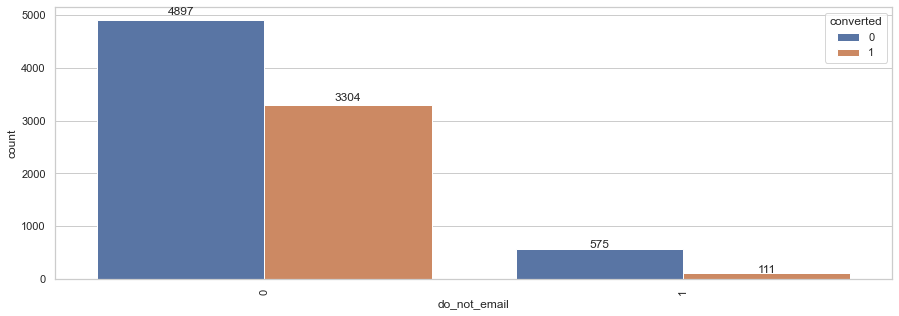

In [73]:
#do_not_email
univar_analysis('do_not_email')

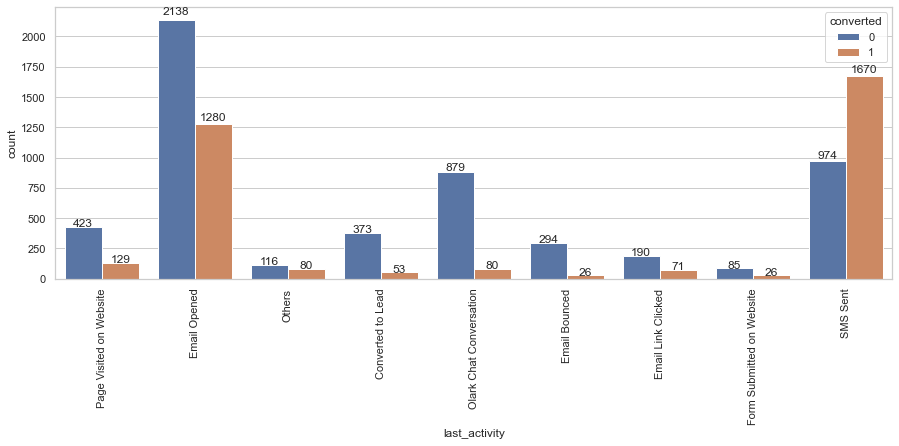

In [74]:
#last_activity
univar_analysis('last_activity')

<h5 style = "color:#00539CFF">Observations:</h5>
1. Last Activity performed by Customers is SMS sent, then it has conversion of 1727.


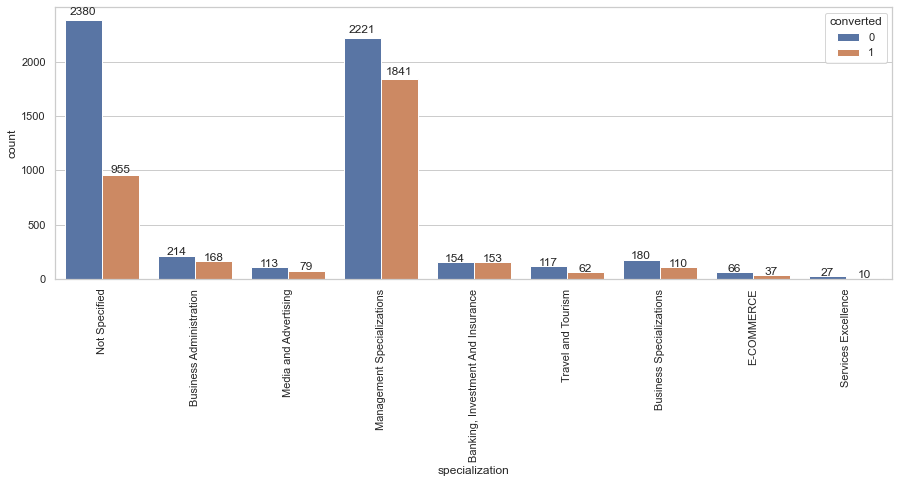

In [75]:
#specialization
univar_analysis('specialization')

<h5 style = "color:#00539CFF">Observations:</h5>
1. Customers who worked in Management Specialization have conversion of 1922. <br>
2. Customers who worked in Service have the least conversion.

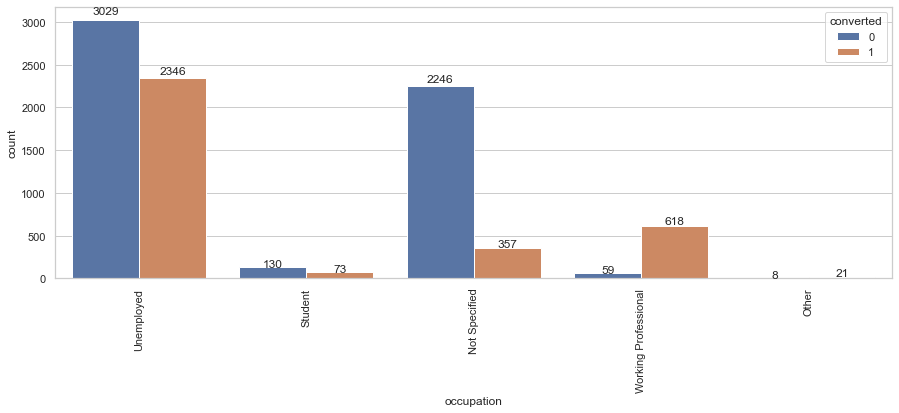

In [76]:
#occupation
univar_analysis('occupation')

<h5 style = "color:#00539CFF">Observations:</h5>
1. It is interesting to know that out of 5600, only 2441 converted. <br>
2. From 706 Working Professionals, 647 converted.

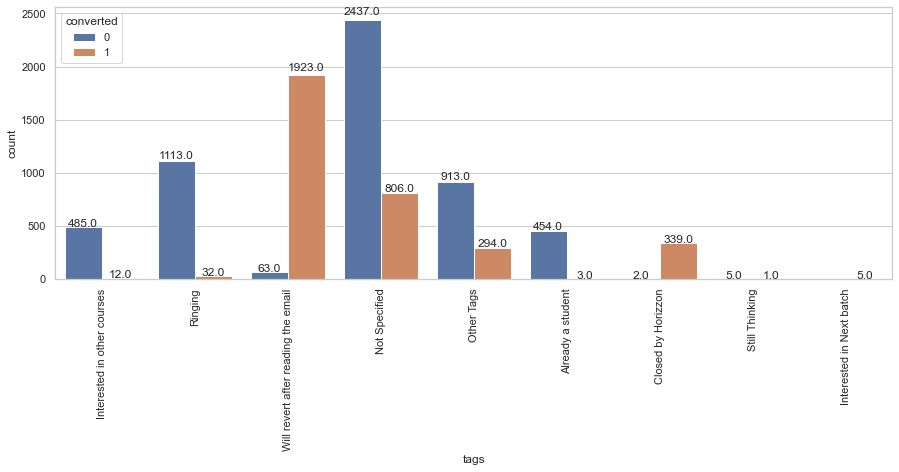

In [77]:
#tags
univar_analysis('tags')

<h5 style = "color:#00539CFF">Observations:</h5>
1. email revert showed high rate of conversion.

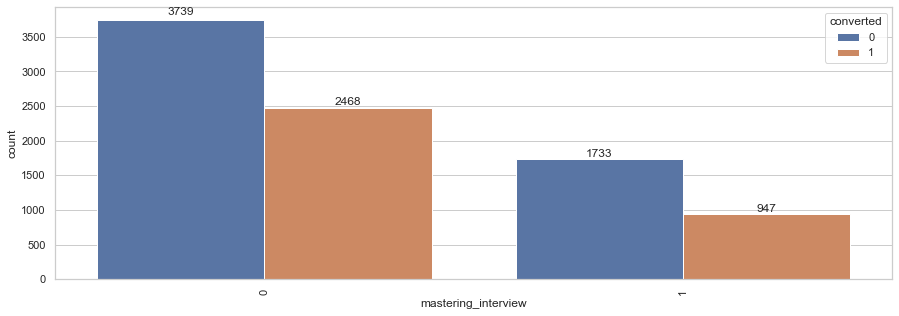

In [78]:
#mastering_interview
univar_analysis('mastering_interview')

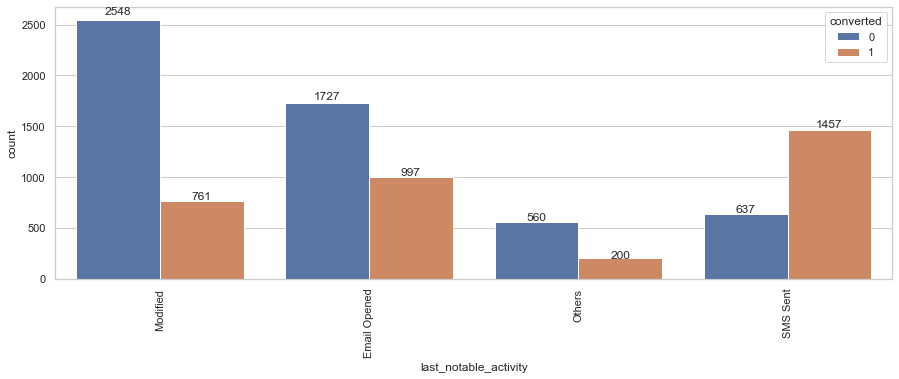

In [79]:
#last_notable_activity
univar_analysis('last_notable_activity')

<h5 style = "color:#00539CFF">Observations:</h5>
1. For individuals with Last Notable activity as SMS sent, 1457 people converted. <br>
2. For individuals with Last Notable activity as Email opened , 997 people converted. 

<h2 style="color:Blue;font-family:Georgia">Correlation</h2>

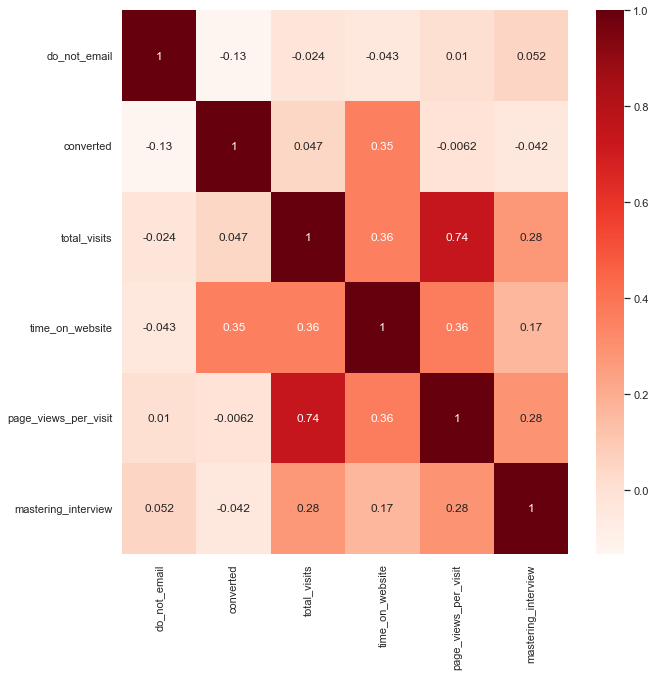

In [80]:
# plotting a correlation values using sns
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, cmap= 'Reds')
plt.show()

<h5 style = "color:#00539CFF">Observations:</h5>
1. total_visits and  page_views_per_visit shows highest correlation of 0.77.

<h1 style="color:#FA7A35;font-family:Georgia">Dummy Variables</h1>

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_origin            8887 non-null   object 
 1   lead_source            8887 non-null   object 
 2   do_not_email           8887 non-null   int64  
 3   converted              8887 non-null   int64  
 4   total_visits           8887 non-null   float64
 5   time_on_website        8887 non-null   int64  
 6   page_views_per_visit   8887 non-null   float64
 7   last_activity          8887 non-null   object 
 8   specialization         8887 non-null   object 
 9   occupation             8887 non-null   object 
 10  tags                   8887 non-null   object 
 11  mastering_interview    8887 non-null   int64  
 12  last_notable_activity  8887 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 972.0+ KB


In [82]:
cat_cols = data.select_dtypes(include = 'object').columns
cat_cols

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'occupation', 'tags', 'last_notable_activity'],
      dtype='object')

In [83]:
data.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,mastering_interview,last_notable_activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


In [84]:
# lead_origin
lead_origin = pd.get_dummies(data['lead_origin'], prefix = 'lead_origin')
lead_origin = lead_origin.drop('lead_origin_Quick Add Form', axis = 1)
data = pd.concat([data, lead_origin], axis = 1)

In [85]:
# lead_source            
lead_source = pd.get_dummies(data['lead_source'], prefix = 'lead_source')
lead_source = lead_source.drop('lead_source_Others', axis = 1)
data = pd.concat([data, lead_source], axis = 1)

In [86]:
# last_activity          
last_activity = pd.get_dummies(data['last_activity'], prefix = 'last_activity')
last_activity = last_activity.drop('last_activity_Others', axis = 1)
data = pd.concat([data, last_activity], axis = 1)

In [87]:
# specialization
specialization = pd.get_dummies(data['specialization'], prefix = 'specialization')
specialization = specialization.drop('specialization_Not Specified', axis = 1)
data = pd.concat([data, specialization], axis = 1)

In [88]:
# occupation
occupation=pd.get_dummies(data.occupation, prefix='occupation')
occupation=occupation.drop('occupation_Other', axis=1)
data=pd.concat([data, occupation], axis=1)

In [89]:
#tags
tags=pd.get_dummies(data.tags, prefix='tags')
tags=tags.drop('tags_Not Specified', axis=1)
data=pd.concat([data, tags], axis=1)

In [90]:
#last_notable_activity
last_notable_activity=pd.get_dummies(data.last_notable_activity, prefix='last_notable_activity')
last_notable_activity=last_notable_activity.drop('last_notable_activity_Others', axis=1)
data=pd.concat([data, last_notable_activity], axis=1)

In [91]:
data=data.drop(cat_cols, axis=1)

In [92]:
data.columns

Index(['do_not_email', 'converted', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'mastering_interview', 'lead_origin_API',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Direct Traffic',
       'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Reference',
       'lead_source_Welingak Website', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Email Link Clicked',
       'last_activity_Email Opened', 'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'specialization_Banking, Investment And Insurance',
       'specialization_Business Administration',
       'specialization_Business Specializations', 'specialization_E-COMMERCE',
       'specialization_Management Specializations',
       'spe

<h1 style="color:#FA7A35;font-family:Georgia">Model Building</h1>

<h2 style="color:Blue;font-family:Georgia">Splitting data into Train and Test</h2>

In [93]:
Y=data.converted
X=data.drop('converted', axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size= 0.70, random_state= 100)

In [95]:
X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_Business Specializations,specialization_E-COMMERCE,specialization_Management Specializations,specialization_Media and Advertising,specialization_Services Excellence,specialization_Travel and Tourism,occupation_Not Specified,occupation_Student,occupation_Unemployed,occupation_Working Professional,tags_Already a student,tags_Closed by Horizzon,tags_Interested in Next batch,tags_Interested in other courses,tags_Other Tags,tags_Ringing,tags_Still Thinking,tags_Will revert after reading the email,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_SMS Sent
601,0,3.0,345,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1488,0,1.0,993,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4099,0,1.0,526,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1201,0,2.0,918,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7388,0,4.0,192,4.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


<h2 style="color:Blue;font-family:Georgia">Scaling Numerical variables</h2>

In [96]:
scaler = StandardScaler()

num_cols = ['total_visits', 'time_on_website', 'page_views_per_visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_Business Specializations,specialization_E-COMMERCE,specialization_Management Specializations,specialization_Media and Advertising,specialization_Services Excellence,specialization_Travel and Tourism,occupation_Not Specified,occupation_Student,occupation_Unemployed,occupation_Working Professional,tags_Already a student,tags_Closed by Horizzon,tags_Interested in Next batch,tags_Interested in other courses,tags_Other Tags,tags_Ringing,tags_Still Thinking,tags_Will revert after reading the email,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_SMS Sent
601,0,0.011996,-0.252142,-0.101088,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1488,0,-0.753316,0.931490,-0.671787,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4099,0,-0.753316,0.078472,-0.671787,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1201,0,-0.370660,0.794496,-0.101088,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7388,0,0.394653,-0.531610,1.040310,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


<h2 style="color:Blue;font-family:Georgia">Building First Model</h2>

In [97]:
# Logistic regression Model building using statsmodels
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6174
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1357.1
Date:                Tue, 24 Jan 2023   Deviance:                       2714.1
Time:                        17:47:39   Pearson chi2:                 6.39e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5930
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.5837      0.812     -0.719      0.472      -2.175       1.007
do_not_email                                        -1.0300      0.275     -3.742      0.000      -1.569      -0.491
total_visits                                         0.3205      0.079      4.063      0.000       0.166       0.475
time_on_website                                      1.0326      0.059     17.612      0.000       0.918       1.147
page_views_per_visit                                -0.3957      0.092     -4.301      0.000      -0.576      -0.215
mastering_interview                                  0.0100      0.166      0.060      0.952      -0.316       0.336
lead_origin_API                                     -0.3940      0.340     -1.159      0.247      -1.060       0.272
lead_origin_Landing Page Submission                 -0.8479      0.371     -2.284      0.022      -1.576      -0.120
lead_origin_Lead Add Form                            1.5148      0.687      2.206      0.027       0.169       2.861
lead_origin_Lead Import                             -0.8565      0.600     -1.427      0.153      -2.032       0.319
lead_source_Direct Traffic                           0.2980      0.472      0.631      0.528      -0.628       1.224
lead_source_Google                                   0.2846      0.453      0.628      0.530      -0.604       1.173
lead_source_Olark Chat                               1.0952      0.474      2.309      0.021       0.166       2.025
lead_source_Organic Search                           0.0983      0.471      0.209      0.835      -0.824       1.021
lead_source_Reference                               -0.8756      0.946     -0.926      0.355      -2.730       0.978
lead_source_Welingak Website                         3.0491      1.342      2.271      0.023       0.418       5.680
last_activity_Converted to Lead                     -0.9193      0.517     -1.779      0.075      -1.932       0.093
last_activity_Email Bounced                         -0.9412      0.610     -1.544      0.123      -2.136       0.254
last_activity_Email Link Clicked                    -0.4362      0.504     -0.866      0.386      -1.423       0.551
last_activity_Email Opened                           0.0823      0.469      0.176      0.861      -0.836       1.001
last_activity_Form Submitted on Website             -0.0149      0.605     -0.025      0.980      -1.200       1.170
last_activity_Olark Chat Conversation               -1.4993      0.465     -3.221      0.001      -2.411      -0.587
last_activity_Page Visited on Website               -0.7283      0.460     -1.584      0.113      -1.630       0.173
last_activity_SMS Sent                   

<h2 style="color:Blue;font-family:Georgia">Feature selection</h2>

In [98]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [99]:
# Selected Variables
col = X_train.columns[rfe.support_]
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'specialization_Travel and Tourism', 'occupation_Not Specified',
       'occupation_Working Professional', 'tags_Already a student',
       'tags_Closed by Horizzon', 'tags_Interested in other courses',
       'tags_Other Tags', 'tags_Ringing',
       'tags_Will revert after reading the email',
       'last_notable_activity_SMS Sent'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]


Index(['total_visits', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_API', 'lead_origin_Landing Page Submission',
       'lead_origin_Lead Import', 'lead_source_Direct Traffic',
       'lead_source_Google', 'lead_source_Organic Search',
       'lead_source_Reference', 'last_activity_Email Link Clicked',
       'last_activity_Email Opened', 'last_activity_Form Submitted on Website',
       'specialization_Banking, Investment And Insurance',
       'specialization_Business Administration',
       'specialization_Business Specializations', 'specialization_E-COMMERCE',
       'specialization_Management Specializations',
       'specialization_Media and Advertising',
       'specialization_Services Excellence', 'occupation_Student',
       'occupation_Unemployed', 'tags_Interested in Next batch',
       'tags_Still Thinking', 'last_notable_activity_Email Opened',
       'last_notable_activity_Modified'],
      dtype='object')

<h2 style="color:Blue;font-family:Georgia">Building Second Model

In [101]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6199
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1383.8
Date:                Tue, 24 Jan 2023   Deviance:                       2767.5
Time:                        17:47:42   Pearson chi2:                 6.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5895
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2249      0.143     -1.575      0.115      -0.505       0.055
do_not_email                                -1.0344      0.259     -3.995      0.000      -1.542      -0.527
time_on_website                              1.0331      0.057     18.079      0.000       0.921       1.145
lead_origin_Lead Add Form                    1.4002      0.327      4.277      0.000       0.759       2.042
lead_source_Olark Chat                       1.1550      0.146      7.891      0.000       0.868       1.442
lead_source_Welingak Website                 3.6394      1.071      3.399      0.001       1.541       5.738
last_activity_Converted to Lead             -1.1492      0.292     -3.932      0.000      -1.722      -0.576
last_activity_Email Bounced                 -1.0437      0.472     -2.210      0.027      -1.969      -0.118
last_activity_Olark Chat Conversation       -1.5388      0.216     -7.116      0.000      -1.963      -1.115
last_activity_Page Visited on Website       -0.6655      0.230     -2.897      0.004      -1.116      -0.215
last_activity_SMS Sent                       0.6090      0.179      3.397      0.001       0.258       0.960
specialization_Travel and Tourism           -0.6102      0.387     -1.578      0.114      -1.368       0.148
occupation_Not Specified                    -2.0026      0.145    -13.852      0.000      -2.286      -1.719
occupation_Working Professional              0.3682      0.312      1.180      0.238      -0.243       0.980
tags_Already a student                      -4.4201      0.604     -7.314      0.000      -5.605      -3.236
tags_Closed by Horizzon                      5.1003      1.024      4.981      0.000       3.093       7.107
tags_Interested in other courses            -3.6437      0.425     -8.571      0.000      -4.477      -2.811
tags_Other Tags                             -1.3659      0.155     -8.784      0.000      -1.671      -1.061
tags_Ringing                                -4.6903      0.265    -17.731      0.000      -5.209      -4.172
tags_Will revert after reading the email     2.8118      0.211     13.341      0.000       2.399       3.225
last_notable_activity_SMS Sent               1.1755      0.190      6.177      0.000       0.802       1.548
============================================================================================================
"""

In [102]:
#Dropping the variables with p-values greater than 0.05 <br>
col = col.drop(['specialization_Travel and Tourism','occupation_Working Professional'])

In [103]:
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'last_activity_SMS Sent',
       'occupation_Not Specified', 'tags_Already a student',
       'tags_Closed by Horizzon', 'tags_Interested in other courses',
       'tags_Other Tags', 'tags_Ringing',
       'tags_Will revert after reading the email',
       'last_notable_activity_SMS Sent'],
      dtype='object')

<h2 style="color:Blue;font-family:Georgia">Building Third Model

In [104]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.8
Date:                Tue, 24 Jan 2023   Deviance:                       2771.6
Time:                        17:47:43   Pearson chi2:                 6.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5892
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2262      0.143     -1.586      0.113      -0.506       0.053
do_not_email                                -1.0383      0.258     -4.027      0.000      -1.544      -0.533
time_on_website                              1.0341      0.057     18.109      0.000       0.922       1.146
lead_origin_Lead Add Form                    1.4679      0.327      4.486      0.000       0.827       2.109
lead_source_Olark Chat                       1.1647      0.146      7.962      0.000       0.878       1.451
lead_source_Welingak Website                 3.5829      1.071      3.344      0.001       1.483       5.683
last_activity_Converted to Lead             -1.1357      0.290     -3.912      0.000      -1.705      -0.567
last_activity_Email Bounced                 -1.0856      0.476     -2.282      0.023      -2.018      -0.153
last_activity_Olark Chat Conversation       -1.5405      0.216     -7.121      0.000      -1.964      -1.117
last_activity_Page Visited on Website       -0.6832      0.230     -2.975      0.003      -1.133      -0.233
last_activity_SMS Sent                       0.6027      0.178      3.378      0.001       0.253       0.952
occupation_Not Specified                    -2.0110      0.145    -13.916      0.000      -2.294      -1.728
tags_Already a student                      -4.4193      0.604     -7.312      0.000      -5.604      -3.235
tags_Closed by Horizzon                      5.1843      1.024      5.061      0.000       3.177       7.192
tags_Interested in other courses            -3.6479      0.425     -8.578      0.000      -4.481      -2.814
tags_Other Tags                             -1.3674      0.155     -8.796      0.000      -1.672      -1.063
tags_Ringing                                -4.6856      0.264    -17.741      0.000      -5.203      -4.168
tags_Will revert after reading the email     2.8607      0.205     13.947      0.000       2.459       3.263
last_notable_activity_SMS Sent               1.1751      0.190      6.201      0.000       0.804       1.547
============================================================================================================
"""

6.7 Checking VIFs

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,last_activity_SMS Sent,5.38
17,last_notable_activity_SMS Sent,4.92
2,lead_origin_Lead Add Form,1.87
0,do_not_email,1.83
6,last_activity_Email Bounced,1.79
3,lead_source_Olark Chat,1.77
16,tags_Will revert after reading the email,1.67
10,occupation_Not Specified,1.56
7,last_activity_Olark Chat Conversation,1.51
1,time_on_website,1.38


In [106]:
# dropping columns with high VIF <br>
col = col.drop(['last_activity_SMS Sent','last_notable_activity_SMS Sent'])

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead_origin_Lead Add Form,1.86
0,do_not_email,1.80
3,lead_source_Olark Chat,1.76
6,last_activity_Email Bounced,1.74
7,last_activity_Olark Chat Conversation,1.46
9,occupation_Not Specified,1.40
1,time_on_website,1.37
15,tags_Will revert after reading the email,1.36
4,lead_source_Welingak Website,1.30
11,tags_Closed by Horizzon,1.29


6.8 Building Fourth Model

In [108]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1492.4
Date:                Tue, 24 Jan 2023   Deviance:                       2984.8
Time:                        17:47:43   Pearson chi2:                 6.75e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5749
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.5025      0.127      3.969      0.000       0.254       0.751
do_not_email                                -0.5397      0.244     -2.214      0.027      -1.018      -0.062
time_on_website                              1.0441      0.055     18.957      0.000       0.936       1.152
lead_origin_Lead Add Form                    1.5088      0.315      4.791      0.000       0.891       2.126
lead_source_Olark Chat                       1.0106      0.138      7.345      0.000       0.741       1.280
lead_source_Welingak Website                 3.5067      1.064      3.297      0.001       1.422       5.592
last_activity_Converted to Lead             -1.7667      0.286     -6.167      0.000      -2.328      -1.205
last_activity_Email Bounced                 -2.1790      0.462     -4.714      0.000      -3.085      -1.273
last_activity_Olark Chat Conversation       -2.0720      0.214     -9.680      0.000      -2.492      -1.653
last_activity_Page Visited on Website       -1.3286      0.225     -5.914      0.000      -1.769      -0.888
occupation_Not Specified                    -2.1841      0.136    -16.087      0.000      -2.450      -1.918
tags_Already a student                      -5.0182      0.604     -8.307      0.000      -6.202      -3.834
tags_Closed by Horizzon                      4.7715      1.028      4.640      0.000       2.756       6.787
tags_Interested in other courses            -4.1099      0.416     -9.868      0.000      -4.926      -3.294
tags_Other Tags                             -1.4565      0.147     -9.896      0.000      -1.745      -1.168
tags_Ringing                                -4.3971      0.252    -17.415      0.000      -4.892      -3.902
tags_Will revert after reading the email     2.7497      0.199     13.839      0.000       2.360       3.139
============================================================================================================
"""

 <h2 style="color:Blue;font-family:Georgia">Predicting the train set</h2>

In [109]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.01540135, 0.92114717, 0.23464363, ..., 0.11389254, 0.19625095,
       0.00654142])

In [110]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.015401,601
1,1,0.921147,1488
2,0,0.234644,4099
3,0,0.044574,1201
4,0,0.011549,7388


In [111]:
# Making a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.015401,601,0
1,1,0.921147,1488,1
2,0,0.234644,4099,0
3,0,0.044574,1201,0
4,0,0.011549,7388,0


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.9059485530546624


In [113]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3608,  201],
       [ 384, 2027]], dtype=int64)

In [114]:
#Metrics beyond Simple Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8407299875570303

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.9472302441585718

In [117]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.0527697558414282


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.9097845601436265


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9038076152304609


<h2 style="color:Blue;font-family:Georgia"> ROC Curve - Plotting

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

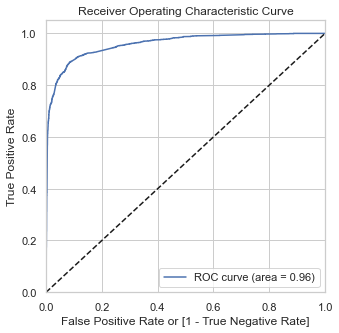

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cut-OFF POINTS

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015401,601,0,1,0,0,0,0,0,0,0,0,0
1,1,0.921147,1488,1,1,1,1,1,1,1,1,1,1,1
2,0,0.234644,4099,0,1,1,1,0,0,0,0,0,0,0
3,0,0.044574,1201,0,1,0,0,0,0,0,0,0,0,0
4,0,0.011549,7388,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.387621     1.000000     0.000000
0.1   0.1  0.771383     0.970137     0.645576
0.2   0.2  0.882476     0.920365     0.858493
0.3   0.3  0.902251     0.891746     0.908900
0.4   0.4  0.904662     0.871008     0.925965
0.5   0.5  0.905949     0.840730     0.947230
0.6   0.6  0.903537     0.811282     0.961932
0.7   0.7  0.890836     0.754873     0.976897
0.8   0.8  0.883762     0.724181     0.984773
0.9   0.9  0.872669     0.688096     0.989499


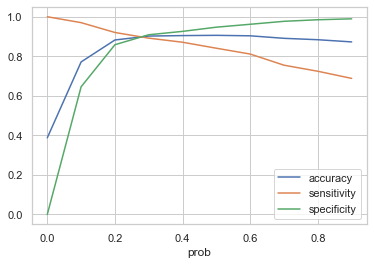

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

<h5 style = "color:#00539CFF">Observations:</h5>
From the curve above, we can see that 0.3 is our Optimal Point

In [126]:
# Making a new column Predicted with values which have Probability greater than 0.3
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.015401,601,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.921147,1488,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.234644,4099,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.044574,1201,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.011549,7388,0,1,0,0,0,0,0,0,0,0,0,0


<h2 style="color:Blue;font-family:Georgia">Accuracy of the model </h2>

In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.9022508038585209


In [128]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3462,  347],
       [ 261, 2150]], dtype=int64)

In [129]:
#Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.891746163417669

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9088999737463901

In [132]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.09110002625360987


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8610332398878654


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9298952457695407


<h2 style="color:Blue;font-family:Georgia">Precision and Recall

In [135]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8610332398878654

In [136]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.891746163417669

In [137]:
#Precision and Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

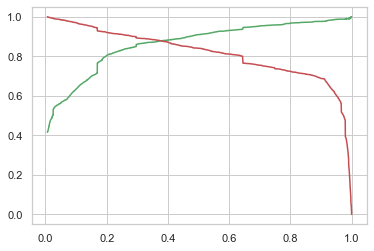

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<h2 style="color:Blue;font-family:Georgia"> Predicting the Test Data

In [139]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [140]:
X_test = X_test[col]
X_test.head()

,do_not_email,time_on_website,lead_origin_Lead Add Form,lead_source_Olark Chat,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,occupation_Not Specified,tags_Already a student,tags_Closed by Horizzon,tags_Interested in other courses,tags_Other Tags,tags_Ringing,tags_Will revert after reading the email
3334,1,-0.832998,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3405,0,1.170774,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8344,0,-0.882316,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2905,1,0.124136,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4966,0,-0.405576,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

3334    0.005118
3405    0.848761
8344    0.024985
2905    0.013327
4966    0.013152
dtype: float64

In [143]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3334,0.005118
3405,0.848761
8344,0.024985
2905,0.013327
4966,0.013152


In [144]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [146]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [147]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,converted,Prospect ID,0
0,0,3334,0.005118
1,1,3405,0.848761
2,0,8344,0.024985
3,0,2905,0.013327
4,0,4966,0.013152


In [148]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [149]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'converted', 'Converted_Prob']]
y_pred_final.head()

,Prospect ID,converted,Converted_Prob
0,3334,0,0.005118
1,3405,1,0.848761
2,8344,0,0.024985
3,2905,0,0.013327
4,4966,0,0.013152


In [150]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,converted,Converted_Prob,Final_Predicted
0,3334,0,0.005118,0
1,3405,1,0.848761,1
2,8344,0,0.024985,0
3,2905,0,0.013327,0
4,4966,0,0.013152,0


In [151]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.converted, y_pred= y_pred_final.Final_Predicted)

0.905511811023622

In [152]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1511,  152],
       [ 100,  904]], dtype=int64)

In [153]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.900398406374502

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.9085989176187613

In [156]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.09140108238123873


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8560606060606061


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9379267535692116


<h1 style="color:#FA7A35;font-family:Georgia">Conclusion

`The variables that were selected finally for prediction are:`

In [159]:
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Olark Chat Conversation',
       'last_activity_Page Visited on Website', 'occupation_Not Specified',
       'tags_Already a student', 'tags_Closed by Horizzon',
       'tags_Interested in other courses', 'tags_Other Tags', 'tags_Ringing',
       'tags_Will revert after reading the email'],
      dtype='object')

<h5 style = "color:#00539CFF">Results:</h5>


1. From the ROC curve, we found out 0.3 is our Optimal Point
2. Overall Accuracy of the model is 0.905511811023622
3. Sensitivity of our logistic regression model is 0.900398406374502
4. specificity of our logistic regression model is 0.9085989176187613
5. false postive rate of our logistic regression model is 0.09140108238123873
6. Positive predictive value of our logistic regression model is 0.8560606060606061
7. Negative predictive value of our logistic regression model is 0.9379267535692116

<h5 style = "color:#00539CFF">Important Features of the Model

In [161]:
res.params.sort_values(ascending=False)

tags_Closed by Horizzon                     4.771457
lead_source_Welingak Website                3.506717
tags_Will revert after reading the email    2.749690
lead_origin_Lead Add Form                   1.508771
time_on_website                             1.044081
lead_source_Olark Chat                      1.010594
const                                       0.502532
do_not_email                               -0.539665
last_activity_Page Visited on Website      -1.328608
tags_Other Tags                            -1.456550
last_activity_Converted to Lead            -1.766736
last_activity_Olark Chat Conversation      -2.072034
last_activity_Email Bounced                -2.178976
occupation_Not Specified                   -2.184060
tags_Interested in other courses           -4.109882
tags_Ringing                               -4.397054
tags_Already a student                     -5.018204
dtype: float64

 <h1 style="color:#FA7A35;font-family:Georgia">Recommendations:</h1>

* The company **should make calls** to the leads coming from `"tags_Closed by Horizzon "` as they are more likely to get converted.
* The company **should make calls** to the leads who spent `"time_on_website"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.

* The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `tags` is `"Already a student"` as they are not likely to get converted.
* The company **should not make calls** to the leads who chose the option of `"Do not Email" as "yes"` as they are not likely to get converted.